In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from dataset import get_manchester

In [3]:
def fit_line(x, y):
    b0, b1 = np.polyfit(x, y, deg=1)
    plt.plot(x, b0*x+b1)

## Across all sessions

In [77]:
df = pd.read_excel('count every function word.xlsx')

In [78]:
df_mean = df.groupby('label').sum()

In [80]:
df_mean = df_mean/12

### frequency

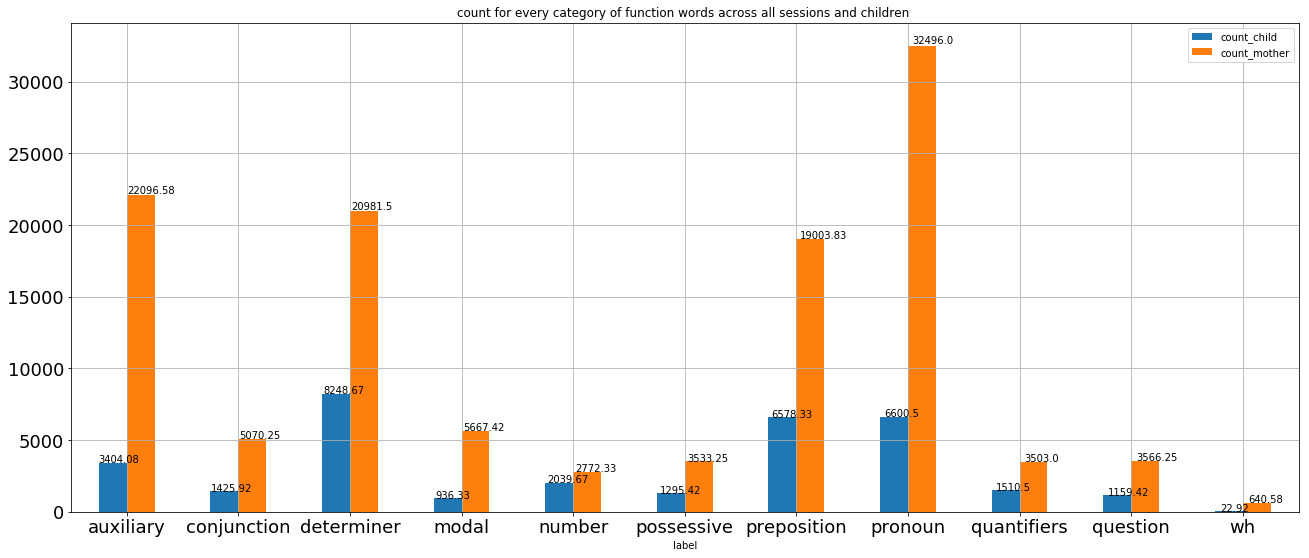

In [82]:
# both child and mother use lots of determiners. 
# 2nd question for child but auxiliary for mother
# 3rd possessive for child but question for mother
# 4th auxiliary for child but 
ax = df_mean.plot.bar(rot=0, title='count for every category of function words across all sessions and children ', figsize=(22,9), fontsize=18, grid = True)
for p in ax.patches:
    ax.annotate(np.round(p.get_height(), decimals = 2), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

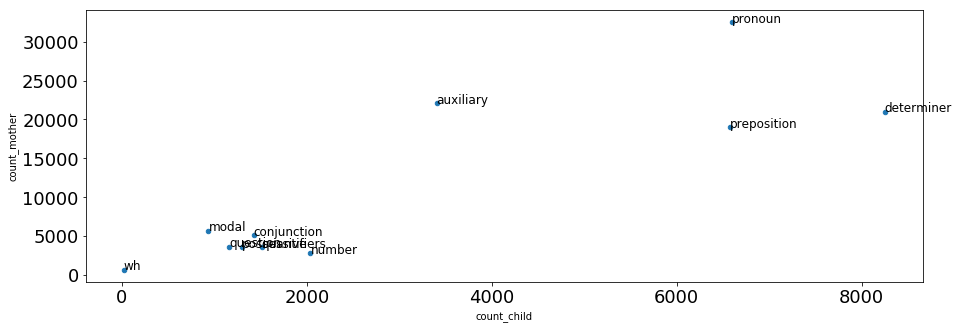

In [83]:
x = df_mean.count_child
y = df_mean.count_mother
ax = df_mean.plot.scatter(x='count_child', y='count_mother', figsize=(15,5), fontsize=18)
for i, txt in enumerate(df_mean.index):
    ax.annotate(txt, (x[i],y[i]), size=12)
    # semilog scale, proportion, token-type ratios

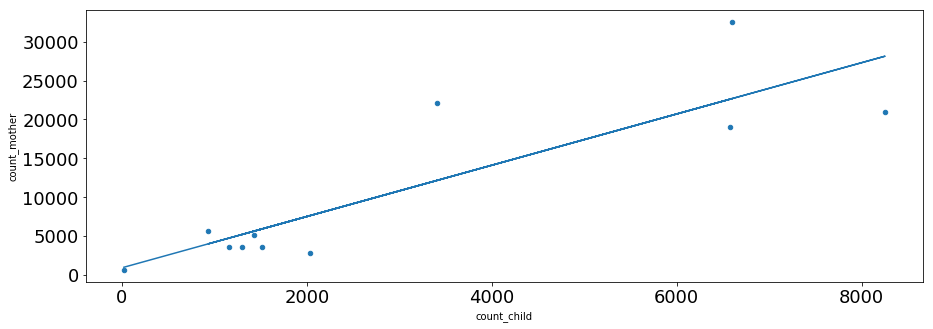

significant
p:  0.0006380086045646931 residuals:  0.6473145768148251


In [84]:
x = df_mean.count_child
y = df_mean.count_mother
ax = df_mean.plot.scatter(x='count_child', y='count_mother', figsize=(15,5), fontsize=18)
fit_line(x, y)
plt.show()
for i, txt in enumerate(df_mean.index):
    ax.annotate(txt, (x[i],y[i]), size=12)
slope,intercept, r_value, p_value, std_err = stats.linregress(x, y)
if p_value < 0.05:
    print('significant')
print('p: ',p_value, 'residuals: ', std_err)

### Proportion
### child

In [98]:
df_per = pd.read_excel('mean per child.xlsx')

In [99]:
df_per.loc[:,'auxiliary':'wh'] = df_per.loc[:,'auxiliary':'wh'].div(df_per['total'], axis = 0)

In [100]:
df_per['check'] = df_per.loc[:,'auxiliary':'wh'].sum(axis = 1)
df_per

,corpus,auxiliary,conjunction,determiners,modal,number,possessive,preposition,pronoun,quantifiers,question,wh,total,check
0,Manchester\anne\anne,0.107901,0.043393,0.228855,0.030224,0.059868,0.042174,0.219457,0.218181,0.048904,0.000870,0.000174,17238,1.0
1,Manchester\aran\aran,0.080446,0.027011,0.287434,0.051262,0.042278,0.042807,0.216970,0.221844,0.028244,0.001468,0.000235,17030,1.0
2,Manchester\becky\becky,0.173521,0.058944,0.230832,0.039900,0.044888,0.021084,0.145273,0.233643,0.049558,0.002267,0.000091,22055,1.0
3,Manchester\carl\carl,0.051170,0.071846,0.341980,0.025647,0.065998,0.014369,0.197368,0.185088,0.045990,0.000543,0.000000,23940,1.0
4,Manchester\domin\domin,0.100311,0.067483,0.237580,0.030120,0.110803,0.033505,0.176594,0.192230,0.051239,0.000068,0.000068,14774,1.0
5,Manchester\gail\gail,0.092595,0.046133,0.229013,0.028511,0.069562,0.042437,0.234029,0.223535,0.033197,0.000924,0.000066,15152,1.0
6,Manchester\joel\joel,0.124766,0.048126,0.214889,0.028643,0.062512,0.040255,0.182440,0.243146,0.053803,0.001226,0.000194,15501,1.0
7,Manchester\john\john,0.058221,0.049802,0.338270,0.009332,0.068973,0.022619,0.204990,0.185719,0.061365,0.000710,0.000000,9859,1.0
8,Manchester\liz\liz,0.098586,0.047067,0.230558,0.036266,0.061469,0.047264,0.236122,0.197499,0.043205,0.001898,0.000065,15276,1.0
9,Manchester\nic\nic,0.108824,0.098095,0.262864,0.031968,0.056273,0.028027,0.194000,0.186008,0.029450,0.004160,0.000328,9134,1.0


In [101]:
df_per = df_per.drop(['total', 'check'], axis = 1)

In [102]:
sum_row = df_per.mean(axis = 0)
df_child = pd.DataFrame(data=sum_row).T

### adult

In [103]:
df_per = pd.read_excel('mean per mother.xlsx')

In [104]:
df_per.loc[:,'auxiliary':'wh'] = df_per.loc[:,'auxiliary':'wh'].div(df_per['total'], axis = 0)

In [105]:
df_per['check'] = df_per.loc[:,'auxiliary':'wh'].sum(axis = 1)
df_per

,corpus,auxiliary,conjunction,determiners,modal,number,possessive,preposition,pronoun,quantifiers,question,wh,total,check
0,Manchester\anne\anne,0.172456,0.047578,0.191691,0.051569,0.023796,0.026977,0.183574,0.267506,0.033339,0.000435,0.001080,66649,1.0
1,Manchester\aran\aran,0.178103,0.049837,0.179446,0.048016,0.019505,0.022985,0.187241,0.284300,0.028958,0.000875,0.000733,98280,1.0
2,Manchester\becky\becky,0.194367,0.041161,0.177461,0.052216,0.023223,0.023608,0.159766,0.293009,0.033933,0.000567,0.000688,49391,1.0
3,Manchester\carl\carl,0.171751,0.039353,0.219954,0.036535,0.029935,0.023236,0.158402,0.291294,0.028502,0.000865,0.000173,40454,1.0
4,Manchester\domin\domin,0.183394,0.043136,0.178344,0.049734,0.031163,0.025005,0.159936,0.299330,0.027954,0.001515,0.000489,61387,1.0
5,Manchester\gail\gail,0.209672,0.052979,0.160551,0.047753,0.024741,0.023335,0.148865,0.307154,0.023202,0.001083,0.000665,52625,1.0
6,Manchester\joel\joel,0.196712,0.052508,0.167803,0.043949,0.026339,0.029117,0.148285,0.297799,0.035446,0.001512,0.000529,52925,1.0
7,Manchester\john\john,0.152851,0.049046,0.213137,0.057823,0.029606,0.025728,0.166370,0.265039,0.038331,0.001100,0.000969,38168,1.0
8,Manchester\liz\liz,0.178510,0.047231,0.196102,0.053283,0.030765,0.022732,0.155484,0.279479,0.034165,0.001151,0.001098,37348,1.0
9,Manchester\nic\nic,0.182165,0.060549,0.160269,0.055895,0.019603,0.029077,0.173494,0.289703,0.027638,0.000419,0.001189,59737,1.0


In [106]:
df_per = df_per.drop(['total', 'check'], axis = 1)

In [107]:
sum_row = df_per.mean(axis = 0)
df_mother = pd.DataFrame(data=sum_row).T

In [108]:
df_meanper = pd.concat([df_child, df_mother], axis = 0).reset_index().drop('index', axis=1).T.rename(index=str, columns={0: "child", 1: "mother"})

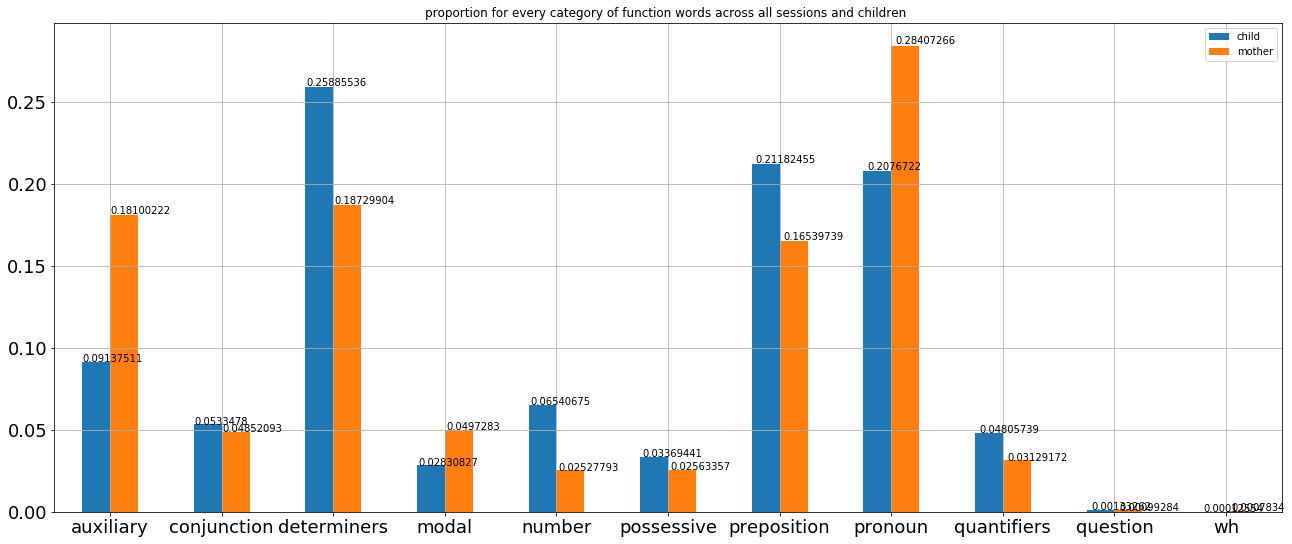

In [110]:
ax = df_meanper.plot.bar(rot=0, title='proportion for every category of function words across all sessions and children ', figsize=(22,9), fontsize=18, grid = True)
for p in ax.patches:
    ax.annotate(np.round(p.get_height(), decimals = 8), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

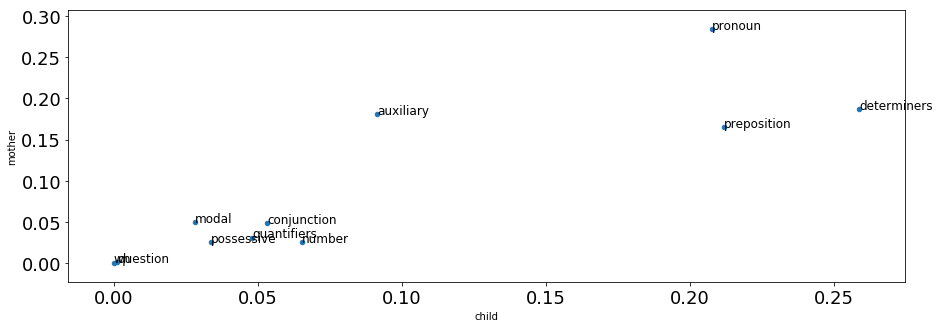

In [111]:
x = df_meanper.child
y = df_meanper.mother
ax = df_meanper.plot.scatter(x='child', y='mother', figsize=(15,5), fontsize=18)
for i, txt in enumerate(df_meanper.index):
    ax.annotate(txt, (x[i],y[i]), size=12)

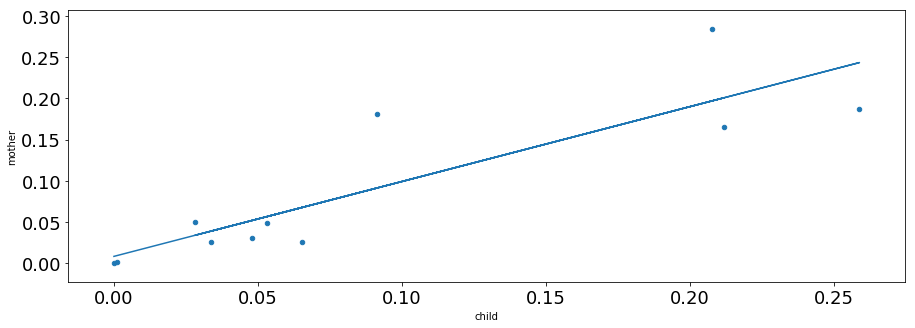

significant
p:  0.0005515100071685265 residuals:  0.17418020390058309


In [112]:
x = df_meanper.child
y = df_meanper.mother
ax = df_meanper.plot.scatter(x='child', y='mother', figsize=(15,5), fontsize=18)
fit_line(x, y)
plt.show()
for i, txt in enumerate(df_meanper.index):
    ax.annotate(txt, (x[i],y[i]), size=12)
slope,intercept, r_value, p_value, std_err = stats.linregress(x, y)
if p_value < 0.05:
    print('significant')
print('p: ',p_value, 'residuals: ', std_err)

### remove the data of determiner

In [110]:
df_node = df[df.label!='determiner']

In [111]:
sum_row = df.sum(axis = 0)
df_sum = pd.DataFrame(data=sum_row).T
df_sum=df_sum.reindex(columns=df.columns)
df_sum.index = ['total']
df_sum = df_node.append(df_sum)

In [112]:
df_sum.loc[:,'count_child':'count_mother':] = df_sum.loc[:,'count_child':'count_mother'].div(df_sum.iloc[-1]['count_child':'count_mother'])

In [113]:
df_sum = df_sum.drop(df_sum.index[-1], axis = 0)

In [114]:
df_sum[['count_child', 'count_mother']] = df_sum[['count_child', 'count_mother']].apply(pd.to_numeric)

In [115]:
df_mean = df_sum.groupby('label').sum()

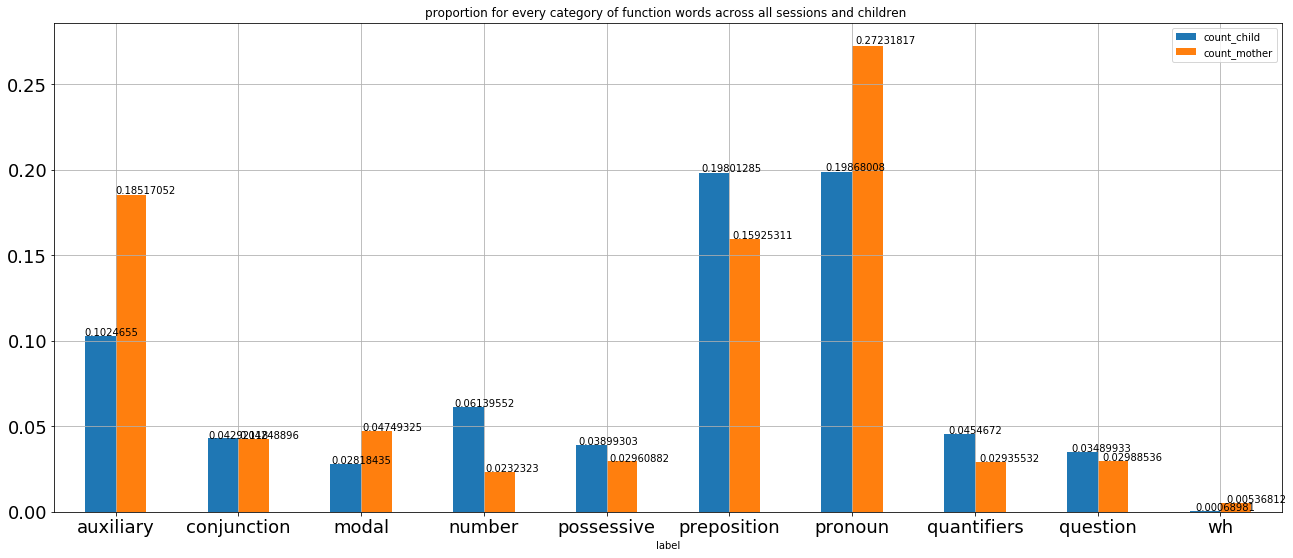

In [116]:
ax = df_mean.plot.bar(rot=0, title='proportion for every category of function words across all sessions and children ', figsize=(22,9), fontsize=18, grid = True)
for p in ax.patches:
    ax.annotate(np.round(p.get_height(), decimals = 8), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

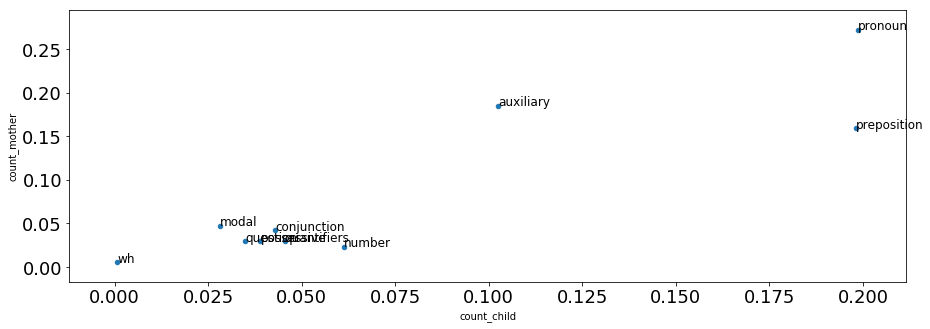

In [117]:
x = df_mean.count_child
y = df_mean.count_mother
ax = df_mean.plot.scatter(x='count_child', y='count_mother', figsize=(15,5), fontsize=18)
for i, txt in enumerate(df_mean.index):
    ax.annotate(txt, (x[i],y[i]), size=12)

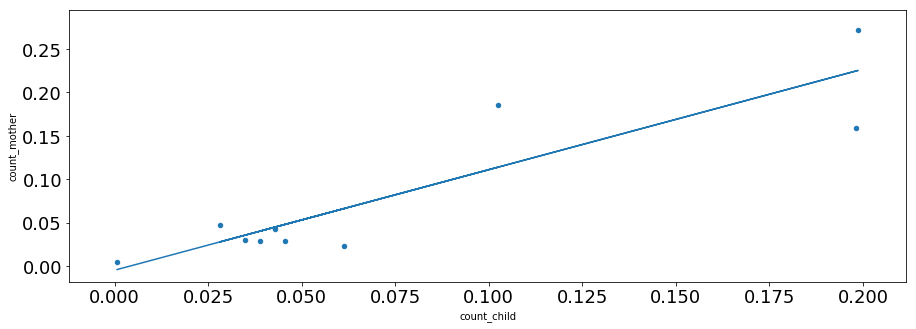

significant
p:  0.0004453683072753968 residuals:  0.20238358647491064


In [118]:
x = df_mean.count_child
y = df_mean.count_mother
ax = df_mean.plot.scatter(x='count_child', y='count_mother', figsize=(15,5), fontsize=18)
fit_line(x, y)
plt.show()
for i, txt in enumerate(df_mean.index):
    ax.annotate(txt, (x[i],y[i]), size=12)
slope,intercept, r_value, p_value, std_err = stats.linregress(x, y)
if p_value < 0.05:
    print('significant')
print('p: ',p_value, 'residuals: ', std_err)

## First and second half

### mean frequency

In [77]:
df17 = pd.read_excel('count function words 17.xlsx')

In [78]:
df_mean = df17.groupby('function').sum()

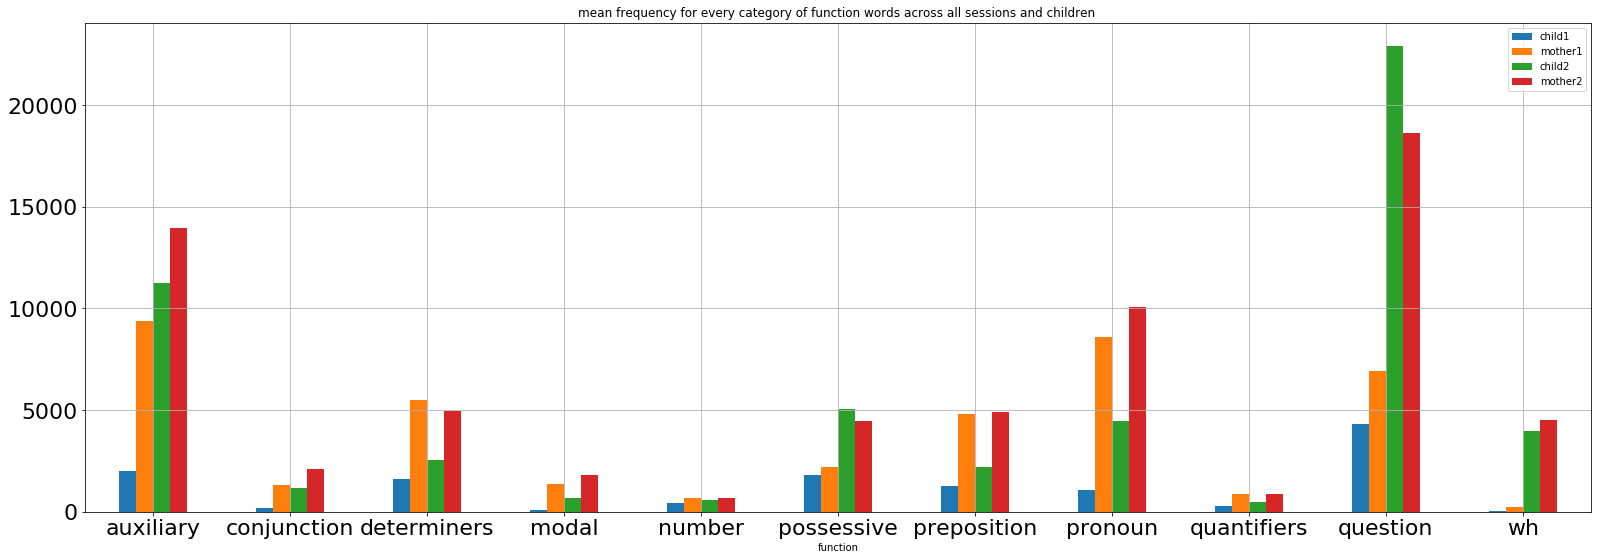

In [79]:
ax = df_mean.plot.bar(rot=0, title='mean frequency for every category of function words across all sessions and children ', figsize=(27,9), fontsize=22, grid = True)
plt.show()

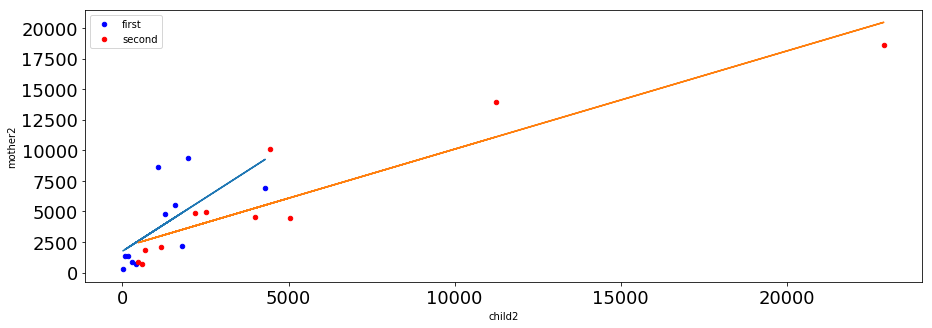

significant
p:  2.9307041444221955e-05 residuals:  0.10401246442704407


In [49]:
x1 = df_mean.child1
y1 = df_mean.mother1
x2 = df_mean.child2
y2 = df_mean.mother2
ax = df_mean.plot.scatter(x='child1', y='mother1', color = 'b', label = 'first', figsize=(15,5), fontsize=18)
df_mean.plot.scatter(x='child2', y='mother2', color = 'r', label = 'second', figsize=(15,5), fontsize=18, ax=ax)
fit_line(x1, y1)
fit_line(x2, y2)
plt.show()
slope,intercept, r_value, p_value, std_err = stats.linregress(x2, y2)
if p_value < 0.05:
    print('significant')
print('p: ',p_value, 'residuals: ', std_err)

### Proportion

In [65]:
sum_row = df17.sum(axis = 0)
df_sum = pd.DataFrame(data=sum_row).T
df_sum=df_sum.reindex(columns=df17.columns)
df_sum.index = ['total']
df_sum = df17.append(df_sum)

In [67]:
df_sum.loc[:,'child1':'mother2'] = df_sum.loc[:,'child1':'mother2'].div(df_sum.iloc[-1]['child1':'mother2'])

In [68]:
df_sum = df_sum.drop(df_sum.index[-1], axis = 0)

In [69]:
df_sum[['child1', 'mother1', 'child2','mother2']] = df_sum[['child1','mother1','child2', 'mother2']].apply(pd.to_numeric)

In [70]:
df_mean = df_sum.groupby('function').sum()

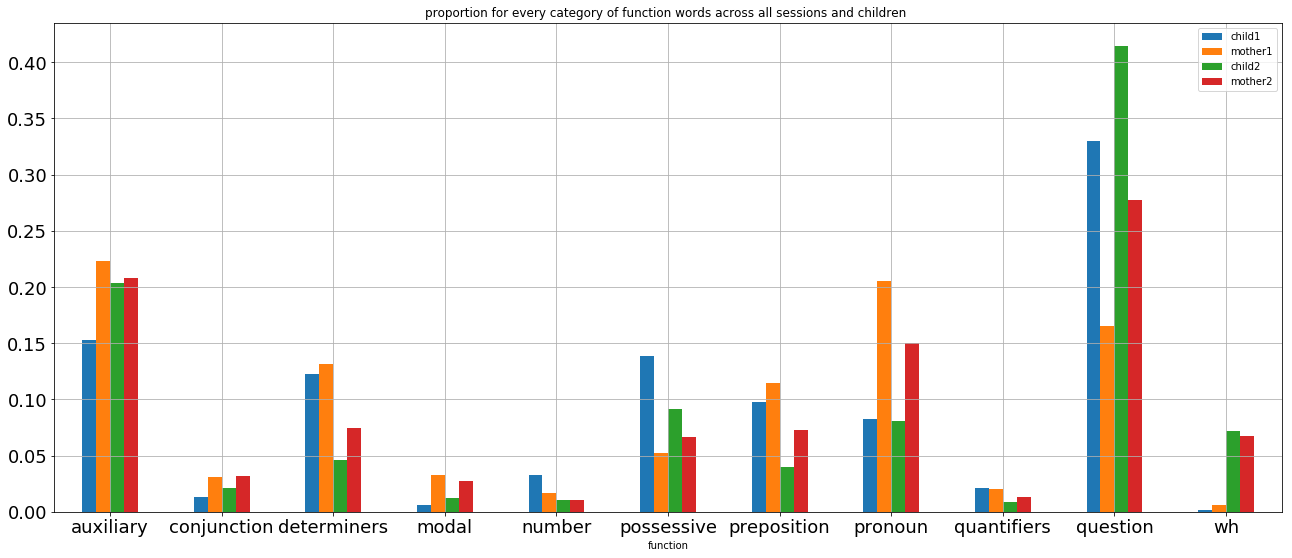

In [74]:
ax = df_mean.plot.bar(rot=0, title='proportion for every category of function words across all sessions and children ', figsize=(22,9), fontsize=18, grid = True)
plt.show()

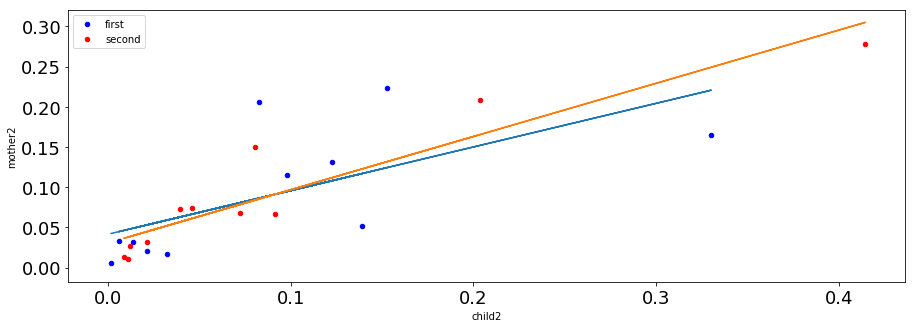

significant
p:  2.9307041444221955e-05 residuals:  0.08570371680921193


In [75]:
x1 = df_mean.child1
y1 = df_mean.mother1
x2 = df_mean.child2
y2 = df_mean.mother2
ax = df_mean.plot.scatter(x='child1', y='mother1', color = 'b', label = 'first', figsize=(15,5), fontsize=18)
df_mean.plot.scatter(x='child2', y='mother2', color = 'r', label = 'second', figsize=(15,5), fontsize=18, ax=ax)
fit_line(x1, y1)
fit_line(x2, y2)
plt.show()
slope,intercept, r_value, p_value, std_err = stats.linregress(x2, y2)
if p_value < 0.05:
    print('significant')
print('p: ',p_value, 'residuals: ', std_err)